#Breast Cancer Detection

Cancer research has always been one of my biggest interests for personal reasons and I've always wanted to contribute my knowledge for advancement of cancer research. 


This data consists of features which are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
Data are also labeled with diagnosis which is either M = malignant or B = benign and the distribution of class is 357 benign, 212 malignant.

Ten real-valued features are computed for each cell nucleus:

*   radius (mean of distances from center to points on the perimeter)

*   texture (standard deviation of gray-scale values)

*   perimeter

*   area

*   smoothness (local variation in radius lengths)

*   compactness (perimeter^2 / area - 1.0)

*   concavity (severity of concave portions of the contour)

*   concave points (number of concave portions of the contour)

*   symmetry

*   fractal dimension ("coastline approximation" - 1)



In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
df = pd.read_csv('/content/gdrive/My Drive/Brainstation/data/breast_cancer.csv')

# Explore Data

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# Processing Data

First clean dataset by removing the column with missing values. 

In [6]:
df.dropna(inplace=True, axis='columns')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [7]:
df.shape

(569, 32)

Change pandas dataframe to a numpy array.

In [8]:
X = df.iloc[:,2:32].values
y = df[['diagnosis']].to_numpy()

In [9]:
print('MAX:\n\n', df.max(), '\n\nMIN:\n\n', df.min())

MAX:

 id                         911320502
diagnosis                          M
radius_mean                    28.11
texture_mean                   39.28
perimeter_mean                 188.5
area_mean                       2501
smoothness_mean               0.1634
compactness_mean              0.3454
concavity_mean                0.4268
concave points_mean           0.2012
symmetry_mean                  0.304
fractal_dimension_mean       0.09744
radius_se                      2.873
texture_se                     4.885
perimeter_se                   21.98
area_se                        542.2
smoothness_se                0.03113
compactness_se                0.1354
concavity_se                   0.396
concave points_se            0.05279
symmetry_se                  0.07895
fractal_dimension_se         0.02984
radius_worst                   36.04
texture_worst                  49.54
perimeter_worst                251.2
area_worst                      4254
smoothness_worst              0

Normalize the data using standardScaler since values range from 4254 to 0.0008948.

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Since diagnosis are not numerical values, one hot encode the diagnosis class.

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [13]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

So 1 means Malignant and 0 means Benign. 

Split data into training and test data at the ratio of 0.3.

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

# Building Neural Network


First fully connected neural network.

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse,accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

model = Sequential()
model.add(Dense(4, input_shape=(30,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=64)

Using TensorFlow backend.


Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 0s 811us/step - loss: 0.6553 - accuracy: 0.6520 - val_loss: 0.5015 - val_accuracy: 0.9240
Epoch 2/100
398/398 [==============================] - 0s 39us/step - loss: 0.4402 - accuracy: 0.9221 - val_loss: 0.3094 - val_accuracy: 0.9766
Epoch 3/100
398/398 [==============================] - 0s 36us/step - loss: 0.2707 - accuracy: 0.9711 - val_loss: 0.1845 - val_accuracy: 0.9854
Epoch 4/100
398/398 [==============================] - 0s 35us/step - loss: 0.1776 - accuracy: 0.9749 - val_loss: 0.1372 - val_accuracy: 0.9795
Epoch 5/100
398/398 [==============================] - 0s 35us/step - loss: 0.1316 - accuracy: 0.9749 - val_loss: 0.1258 - val_accuracy: 0.9708
Epoch 6/100
398/398 [==============================] - 0s 35us/step - loss: 0.1110 - accuracy: 0.9774 - val_loss: 0.0958 - val_accuracy: 0.9708
Epoch 7/100
398/398 [==============================] - 0s 35us/step - loss: 0.1017 - accu

In [16]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 0s 302us/step - loss: 0.7571 - accuracy: 0.4623 - val_loss: 0.7195 - val_accuracy: 0.4825
Epoch 2/100
398/398 [==============================] - 0s 37us/step - loss: 0.7093 - accuracy: 0.5126 - val_loss: 0.6725 - val_accuracy: 0.5526
Epoch 3/100
398/398 [==============================] - 0s 34us/step - loss: 0.6656 - accuracy: 0.5590 - val_loss: 0.6294 - val_accuracy: 0.6140
Epoch 4/100
398/398 [==============================] - 0s 35us/step - loss: 0.6251 - accuracy: 0.6520 - val_loss: 0.5889 - val_accuracy: 0.6520
Epoch 5/100
398/398 [==============================] - 0s 42us/step - loss: 0.5874 - accuracy: 0.7186 - val_loss: 0.5493 - val_accuracy: 0.7456
Epoch 6/100
398/398 [==============================] - 0s 35us/step - loss: 0.5489 - accuracy: 0.7525 - val_loss: 0.5116 - val_accuracy: 0.7778
Epoch 7/100
398/398 [==============================] - 0s 35us/step - loss: 0.5127 - accu

Convert predictions to label.


In [17]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

Convert one hot encoded test label to label.

In [18]:
def convert_prediction2label(pred):
  l = list()
  for i in range(len(pred)):
    l.append(np.argmax(pred[i]))
  return l

In [19]:
train = convert_prediction2label(y_train)
test = convert_prediction2label(y_test)

Calculate the accuracy score for training and test set.

In [20]:
from sklearn.metrics import accuracy_score
print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(test, y_test_pred)))

The Accuracy score on the Train set is:	0.990
The Accuracy score on the Test set is:	0.994


# Visualization

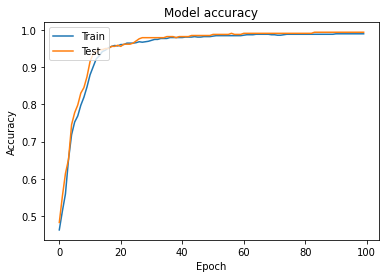

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

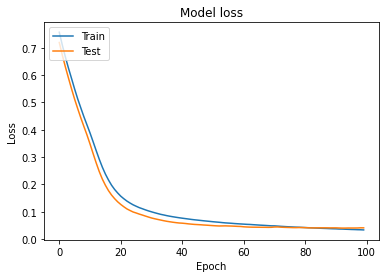

In [23]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

According to both graphs, it looks epoch 30 would have been enough to get the same level of accuracy.

#Feature Selection#

In [24]:
features_to_include = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [25]:
from sklearn import feature_selection

feature_importances = feature_selection.mutual_info_classif(df[features_to_include],df['diagnosis'])
feature_importances

array([0.36611624, 0.09852932, 0.40066928, 0.35897257, 0.07671551,
       0.21500905, 0.37304632, 0.44121908, 0.05575102, 0.00403248,
       0.24720362, 0.00238074, 0.27317799, 0.33950068, 0.01701878,
       0.07649325, 0.11714419, 0.13223639, 0.01391154, 0.03750925,
       0.45226083, 0.12444796, 0.47456464, 0.4644563 , 0.09713198,
       0.22439715, 0.31462526, 0.43715936, 0.09133437, 0.06815873])

In [26]:
feat_importance_df = pd.DataFrame(list(zip(features_to_include, feature_importances)), columns=['feature','importance'])

In [27]:
feat_importance_df.sort_values(by='importance', ascending=False, inplace=True)

In [28]:
top_feats = [x for x in feat_importance_df['feature'][0:5]]
top_feats

['perimeter_worst',
 'area_worst',
 'radius_worst',
 'concave points_mean',
 'concave points_worst']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


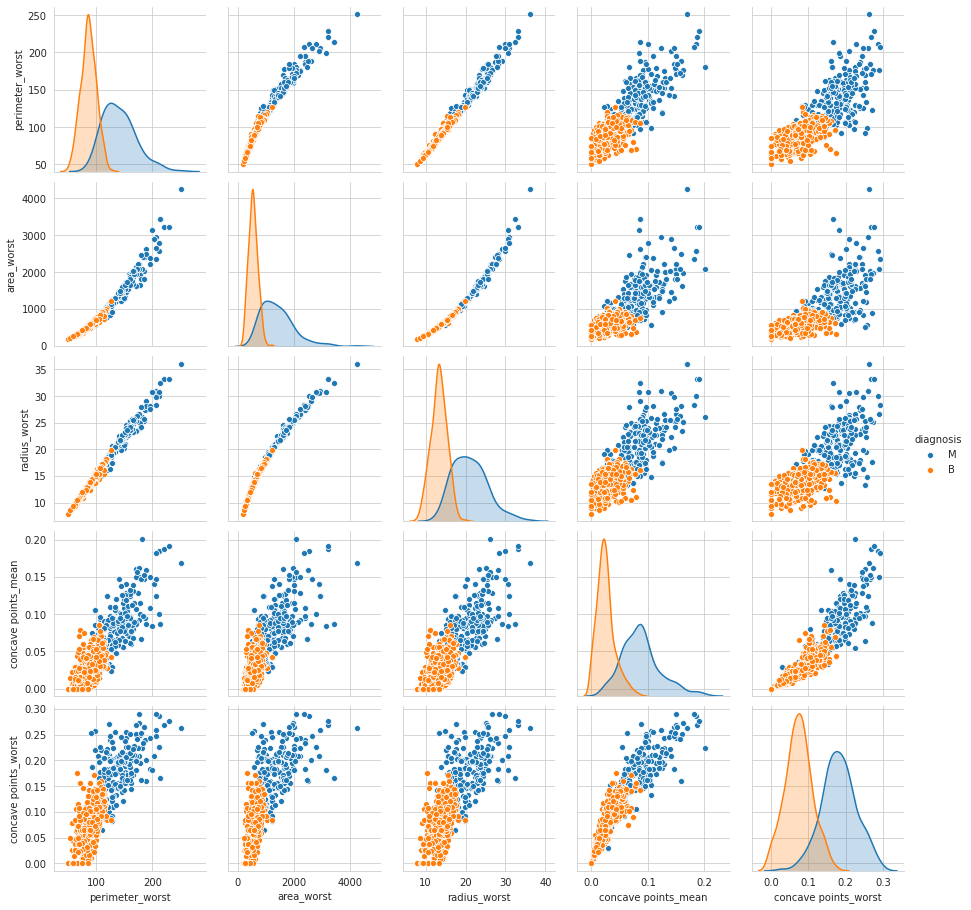

In [29]:
import seaborn as sns
%matplotlib inline
# draw decision boundary
sns.set_style('whitegrid')
top_feats = ['perimeter_worst', 'area_worst', 'radius_worst', 'concave points_mean', 'concave points_worst', 'diagnosis']
sns.pairplot(df[top_feats],hue="diagnosis")